# Lecture 2 Development Notebook for Serving Models in Streamlit

In [1]:
## Imports
import joblib
from lime.lime_tabular import LimeTabularExplainer

In [2]:
## Import pathlib file
pathlib = joblib.load('pathlib.joblib')
pathlib

{'models': {'RF': 'Models/RF_Pipe.joblib',
  'logreg': 'Models/logreg_pipe.joblib'},
 'data': {'train': 'Data/train.joblib', 'test': 'Data/test.joblib'}}

In [5]:
# def load_data(pathlib) to load data from pathlib file
def load_data(pathlib):
    train_path = pathlib['data']['train']
    X_train,y_train = joblib.load(train_path)
    test_path = pathlib['data']['test']
    X_test, y_test = joblib.load(test_path)
    return X_train, y_train, X_test, y_test
    
## test load_data(pathlib)

X_train,y_train,X_test, y_test = load_data(pathlib)
X_train.head(),X_test.head()

(      no_of_dependents      education self_employed  income_annum  \
 3977                 5       Graduate           Yes       7600000   
 2425                 0   Not Graduate            No       6000000   
 1545                 2   Not Graduate           Yes       8200000   
 173                  2   Not Graduate           Yes       7400000   
 3405                 1       Graduate           Yes       3400000   
 
       loan_amount  loan_term  cibil_score  residential_assets_value  \
 3977     18000000         12          452                   7900000   
 2425     22900000         16          302                  12200000   
 1545     27800000         16          827                  11500000   
 173      28200000          8          376                  21900000   
 3405      7000000          4          534                   3100000   
 
       commercial_assets_value  luxury_assets_value  bank_asset_value  
 3977                  4300000             23800000           4700000  


In [6]:
# def load_model(pathlib) from pathlib file
def load_model(pathlib, model_name='RF'):
    model_path = pathlib['models'][model_name]
    model = joblib.load(model_path)
    return model

## test load_model function
model_names = ['RF','logreg']

for model in model_names:
    print(model)
    model = load_model(pathlib, model_name=model)
    display(model)

RF


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

logreg


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [7]:
## def get_explainer()
def get_explainer(_model_pipe, X_train, labels):
    X_train_sc = _model_pipe[0].transform(X_train)
    feature_names = _model_pipe[0].get_feature_names_out()
    explainer = LimeTabularExplainer(
                    X_train_sc,
                    mode='classification',
                    feature_names=feature_names,
                    class_names=labels,
                    random_state=42
                    )
    return explainer

## test get_explainer()
explainer = get_explainer(model, X_train, labels=None)
explainer

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


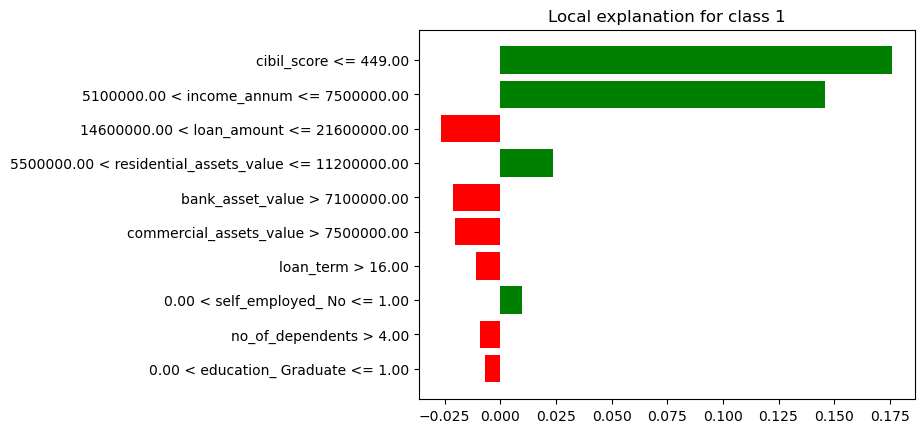

In [8]:
## def explain_instance()
def explain_instance(_explainer, _model_pipe, instance_to_explain):
    instance_to_explain_sc = _model_pipe[0].transform(instance_to_explain)
    explanation = _explainer.explain_instance(instance_to_explain_sc[0],
                                             _model_pipe[-1].predict_proba
                                             )
    return explanation

## test explain_instance()
explanation = explain_instance(explainer, model, X_test.head(1))
display(explanation)
explanation.as_pyplot_figure();